# ARGO DATA in mediterranean see

In [1]:
import xarray as xr
import numpy as np

import argopy
# at ifremer in local
# argopy.set_options(cachedir='/home1/homedir5/perso/agarciaj/.cache/argopy',src='localftp',local_ftp='/home/ref-argo/gdac')
# datarmor
argopy.set_options(src='localftp',local_ftp='/home/ref-argo/gdac')
from argopy import DataFetcher as ArgoDataFetcher
# argo_loader = ArgoDataFetcher(cache=True)
# datarmor: not necessary to do a cache 
argo_loader = ArgoDataFetcher()

import pyxpcm
from pyxpcm.models import pcm

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import seaborn as sns

## Looking for data

read list of floats in mediterranean from jcommops

In [2]:
list_floats = np.loadtxt('MedFloats_2017-2020.csv', delimiter=",",dtype='int')
list_floats = np.delete(list_floats, 0)
list_floats

array([6903260, 6903235, 6903284, 6903283, 6903279, 3901975, 6902969,
       6902842, 6903263, 6903250, 6902900, 6902902, 6902718, 6902873,
       6902845, 6903222, 6903285, 6903287, 6903202, 6902764, 6901252,
       6902767, 6901270, 3901973, 6903266, 6902945, 6903245, 6903246,
       6902770, 6903242, 6902875, 6903241, 6903268, 6903286, 6903238,
       6901250, 6902722, 3901907, 3901978, 6902847, 3901977, 6902848,
       6902874, 6901775, 6903262, 6903267, 6903224, 6903282, 3901890,
       6901267, 6903225, 6903239, 6902879, 6902803, 3901974, 6902872,
       6903259, 6903247, 6903765, 3901908, 6903243, 6903270, 6903236,
       6903281, 6903280, 6903244, 6901249, 6902901, 6902876, 6901251,
       6902850, 6903221, 6902904, 6903269, 3901957, 6902826, 6902870,
       6902903, 6901774, 6902968, 6903248, 6902913, 6903234, 6902898,
       6902846, 6901772, 3901976, 6903278, 6901275, 6901277, 6903227,
       6902935, 6902937, 6902844, 6902769, 6902954, 6903265, 6903237,
       6902871, 6903

In [3]:
len(list_floats)

107

looking for data with argopy

In [4]:
#ds = argo_loader.float(list_floats[0:10]).to_xarray()
ds = argo_loader.float(list_floats).to_xarray()
ds

/home1/datawork/kbalem/EnvConda/BlueCloud/lib/python3.6/site-packages/argopy/data_fetchers/localftp_data.py:300: UserWarning: Fetching more than one file in a single request is not yet fully reliable. If you encounter an error, try to load each float separately.
  warnings.warn("Fetching more than one file in a single request is not yet fully reliable. "


<xarray.Dataset>
Dimensions:          (N_POINTS: 4300350)
Coordinates:
    TIME             (N_POINTS) datetime64[ns] 2019-03-05T21:45:00 ... 2019-11-12T10:25:59.999999744
    LONGITUDE        (N_POINTS) float64 25.3 25.3 25.3 25.3 ... 6.57 6.57 6.57
    LATITUDE         (N_POINTS) float64 34.06 34.06 34.06 ... 41.12 41.12 41.12
  * N_POINTS         (N_POINTS) int64 0 1 2 3 ... 4300347 4300348 4300349
Data variables:
    CYCLE_NUMBER     (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 84 84 84 84 84 84 84
    DATA_MODE        (N_POINTS) <U1 'R' 'R' 'R' 'R' 'R' ... 'R' 'R' 'R' 'R' 'R'
    DIRECTION        (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 6903260 6903260 ... 6901657 6901657
    POSITION_QC      (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float32 8.2 14.5 24.3 ... 1957.4 1962.5 1966.2
    PRES_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PSAL             (N_POINTS) float32 39.304 39.305 39.304 ... 38.483 38.483
    PSAL_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float32 16.756 16.763 16.765 ... 13.214 13.214
    TEMP_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /home/ref-argo/gdac
    Fetched_by:           agarciaj
    Fetched_date:         2020/07/08
    Fetched_constraints:  phy;WMO3901890;WMO3901907;WMO3901908;WMO3901957;WMO...
    history:              Variables filtered according to DATA_MODE; Variable...

trying with region

In [ ]:
# only one year
ds = argo_loader.region([-6, 35, 30, 46, 0, 1000, '2011', '2012']).to_xarray()
ds

/export/home1/agarciaj/anaconda3/envs/BlueCloud/lib/python3.6/site-packages/argopy/data_fetchers/localftp_data.py:300: UserWarning: Fetching more than one file in a single request is not yet fully reliable. If you encounter an error, try to load each float separately.
  warnings.warn("Fetching more than one file in a single request is not yet fully reliable. "


Oops! <class 'UnicodeDecodeError'> occured.
Fail to cast:  object into: <class 'str'> for:  SCIENTIFIC_CALIB_COEFFICIENT
Encountered unique values: [b'                                                                                                                                                                                                                                                                '
 b'none                                                                                                                                                                                                                                                            '
 b'r = 0.9996 (\xb1 0.00006), vertically averaged dS = -0.0160 (\xb1 0.0030)                                                                                                                                                                                             ']
Oops! <class 'UnicodeDecodeError'> occured.
Fail to cast:  obj

Oops! <class 'UnicodeDecodeError'> occured.
Fail to cast:  object into: <class 'str'> for:  SCIENTIFIC_CALIB_COEFFICIENT
Encountered unique values: [b'                                                                                                                                                                                                                                                                '
 b'none                                                                                                                                                                                                                                                            '
 b'r = 0.9996 (\xb1 0.00006), vertically averaged dS = -0.0160 (\xb1 0.0030)                                                                                                                                                                                             ']
Oops! <class 'UnicodeDecodeError'> occured.
Fail to cast:  obj

Oops! <class 'UnicodeDecodeError'> occured.
Fail to cast:  object into: <class 'str'> for:  SCIENTIFIC_CALIB_COEFFICIENT
Encountered unique values: [b'                                                                                                                                                                                                                                                                '
 b'none                                                                                                                                                                                                                                                            '
 b'r = 0.9996 (\xb1 0.00006), vertically averaged dS = -0.0160 (\xb1 0.0030)                                                                                                                                                                                             ']
Oops! <class 'UnicodeDecodeError'> occured.
Fail to cast:  obj

Oops! <class 'UnicodeDecodeError'> occured.
Fail to cast:  object into: <class 'str'> for:  SCIENTIFIC_CALIB_COEFFICIENT
Encountered unique values: [b'                                                                                                                                                                                                                                                                '
 b'none                                                                                                                                                                                                                                                            '
 b'r = 0.9996 (\xb1 0.00006), vertically averaged dS = -0.0160 (\xb1 0.0030)                                                                                                                                                                                             ']
Oops! <class 'UnicodeDecodeError'> occured.
Fail to cast:  obj

Oops! <class 'UnicodeDecodeError'> occured.
Fail to cast:  object into: <class 'str'> for:  SCIENTIFIC_CALIB_COEFFICIENT
Encountered unique values: [b'                                                                                                                                                                                                                                                                '
 b'none                                                                                                                                                                                                                                                            '
 b'r = 0.9998 (\xb1 0.00003), vertically averaged dS = -0.009 (\xb1 0.002)                                                                                                                                                                                               ']
Oops! <class 'UnicodeDecodeError'> occured.
Fail to cast:  obj

Oops! <class 'UnicodeDecodeError'> occured.
Fail to cast:  object into: <class 'str'> for:  SCIENTIFIC_CALIB_COEFFICIENT
Encountered unique values: [b'                                                                                                                                                                                                                                                                '
 b'none                                                                                                                                                                                                                                                            '
 b'r = 0.9998 (\xb1 0.00003), vertically averaged dS = -0.009 (\xb1 0.002)                                                                                                                                                                                               ']
Oops! <class 'UnicodeDecodeError'> occured.
Fail to cast:  obj

In [ ]:
# trying yo use more then one year
#ds1 = argo_loader.region([30, 46, -6, 35, 0, 1000, '2011', '2012']).to_xarray()
#ds2 = argo_loader.region([30, 46, -6, 35, 0, 1000, '2012', '2013']).to_xarray()
#ds = xr.concat([ds1,ds2],dim='N_POINTS')
#ds

In [5]:
dsp = ds.argo.point2profile()
dsp

<xarray.Dataset>
Dimensions:          (N_LEVELS: 1119, N_PROF: 13824)
Coordinates:
  * N_PROF           (N_PROF) int64 4388 247 4389 3497 ... 11891 9197 12175 6519
    LONGITUDE        (N_PROF) float64 1.43 6.48 1.495 ... 2.504 1.766 23.21
    TIME             (N_PROF) datetime64[ns] 2017-01-21T04:52:19.999999744 ... 2020-07-07T23:00:30
  * N_LEVELS         (N_LEVELS) int64 0 1 2 3 4 5 ... 1114 1115 1116 1117 1118
    LATITUDE         (N_PROF) float64 36.93 37.49 37.15 ... 40.65 36.85 34.61
Data variables:
    CYCLE_NUMBER     (N_PROF) int64 1 1 2 1 1 2 3 ... 71 52 125 144 106 288 378
    DATA_MODE        (N_PROF) <U1 'R' 'D' 'R' 'R' 'D' ... 'R' 'R' 'R' 'R' 'R'
    DIRECTION        (N_PROF) <U1 'A' 'D' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 6902769 3901907 6902769 ... 6903248 6902847
    POSITION_QC      (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 6.1 6.9 7.7 8.5 ... nan nan nan
    PRES_QC          (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PSAL             (N_PROF, N_LEVELS) float32 36.637 36.633 36.636 ... nan nan
    PSAL_QC          (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TEMP             (N_PROF, N_LEVELS) float32 15.752 15.761 15.759 ... nan nan
    TEMP_QC          (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /home/ref-argo/gdac
    Fetched_by:           agarciaj
    Fetched_date:         2020/07/08
    Fetched_constraints:  phy;WMO3901890;WMO3901907;WMO3901908;WMO3901957;WMO...
    history:              Variables filtered according to DATA_MODE; Variable...

In [7]:
# interpolation to standard levels
z = np.arange(0.,200,1.)
z

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [8]:
dsi = dsp.argo.interp_std_levels(z)
dsi

<xarray.Dataset>
Dimensions:            (N_PROF: 11827, PRES_INTERPOLATED: 200)
Coordinates:
  * N_PROF             (N_PROF) int64 4388 247 4389 3497 ... 9197 12175 6519
    LONGITUDE          (N_PROF) float64 1.43 6.48 1.495 ... 2.504 1.766 23.21
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 0.0 1.0 2.0 ... 198.0 199.0
    TIME               (N_PROF) datetime64[ns] 2017-01-21T04:52:19.999999744 ... 2020-07-07T23:00:30
    LATITUDE           (N_PROF) float64 36.93 37.49 37.15 ... 40.65 36.85 34.61
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 1.0 1.0 2.0 1.0 ... 106.0 288.0 378.0
    DATA_MODE          (N_PROF) object 'R' 'D' 'R' 'R' 'D' ... 'R' 'R' 'R' 'R'
    DIRECTION          (N_PROF) object 'A' 'D' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 6.903e+06 3.902e+06 ... 6.903e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 6.1 6.1 ... 199.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 36.637 ... 39.05611
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 15.752 ... 15.067779
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /home/ref-argo/gdac
    Fetched_by:           agarciaj
    Fetched_date:         2020/07/08
    Fetched_constraints:  phy;WMO3901890;WMO3901907;WMO3901908;WMO3901957;WMO...
    history:              Variables filtered according to DATA_MODE; Variable...

In [9]:
dsi['PRES_INTERPOLATED'] = -dsi.PRES_INTERPOLATED

In [10]:
dsi

<xarray.Dataset>
Dimensions:            (N_PROF: 11827, PRES_INTERPOLATED: 200)
Coordinates:
  * N_PROF             (N_PROF) int64 4388 247 4389 3497 ... 9197 12175 6519
    LONGITUDE          (N_PROF) float64 1.43 6.48 1.495 ... 2.504 1.766 23.21
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 -0.0 -1.0 ... -198.0 -199.0
    TIME               (N_PROF) datetime64[ns] 2017-01-21T04:52:19.999999744 ... 2020-07-07T23:00:30
    LATITUDE           (N_PROF) float64 36.93 37.49 37.15 ... 40.65 36.85 34.61
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 1.0 1.0 2.0 1.0 ... 106.0 288.0 378.0
    DATA_MODE          (N_PROF) object 'R' 'D' 'R' 'R' 'D' ... 'R' 'R' 'R' 'R'
    DIRECTION          (N_PROF) object 'A' 'D' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 6.903e+06 3.902e+06 ... 6.903e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 6.1 6.1 ... 199.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 36.637 ... 39.05611
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 15.752 ... 15.067779
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /home/ref-argo/gdac
    Fetched_by:           agarciaj
    Fetched_date:         2020/07/08
    Fetched_constraints:  phy;WMO3901890;WMO3901907;WMO3901908;WMO3901957;WMO...
    history:              Variables filtered according to DATA_MODE; Variable...

In [ ]:
dsi.PRES.values

## Applying PCM

### Create PCM

In [11]:
z = np.arange(0.,-200,-1.)
pcm_features = {'temperature': z}
m = pcm(K=8, features=pcm_features)
m

<pcm 'gmm' (K: 8, F: 1)>
Number of class: 8
Number of feature: 1
Feature names: odict_keys(['temperature'])
Fitted: False
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>

### Fit model

In [12]:
features_in_ds = {'temperature': 'TEMP'}
features_zdim='PRES_INTERPOLATED'
m.fit(dsi, features=features_in_ds, dim=features_zdim)
m

<pcm 'gmm' (K: 8, F: 1)>
Number of class: 8
Number of feature: 1
Feature names: odict_keys(['temperature'])
Fitted: True
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: -3.353022

### Classify data

In [13]:
m.predict(dsi, features=features_in_ds, dim=features_zdim, inplace=True)
dsi

<xarray.Dataset>
Dimensions:            (N_PROF: 11827, PRES_INTERPOLATED: 200)
Coordinates:
  * N_PROF             (N_PROF) int64 4388 247 4389 3497 ... 9197 12175 6519
    LONGITUDE          (N_PROF) float64 1.43 6.48 1.495 ... 2.504 1.766 23.21
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 -0.0 -1.0 ... -198.0 -199.0
    TIME               (N_PROF) datetime64[ns] 2017-01-21T04:52:19.999999744 ... 2020-07-07T23:00:30
    LATITUDE           (N_PROF) float64 36.93 37.49 37.15 ... 40.65 36.85 34.61
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 1.0 1.0 2.0 1.0 ... 106.0 288.0 378.0
    DATA_MODE          (N_PROF) object 'R' 'D' 'R' 'R' 'D' ... 'R' 'R' 'R' 'R'
    DIRECTION          (N_PROF) object 'A' 'D' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 6.903e+06 3.902e+06 ... 6.903e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 6.1 6.1 ... 199.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 36.637 ... 39.05611
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 15.752 ... 15.067779
    PCM_LABELS         (N_PROF) int64 0 0 0 5 1 5 0 5 0 0 ... 4 4 7 4 4 4 7 7 4
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /home/ref-argo/gdac
    Fetched_by:           agarciaj
    Fetched_date:         2020/07/08
    Fetched_constraints:  phy;WMO3901890;WMO3901907;WMO3901908;WMO3901957;WMO...
    history:              Variables filtered according to DATA_MODE; Variable...

In [14]:
m.predict_proba(dsi, features=features_in_ds, dim=features_zdim, inplace=True)
dsi

<xarray.Dataset>
Dimensions:            (N_PROF: 11827, PRES_INTERPOLATED: 200, pcm_class: 8)
Coordinates:
  * N_PROF             (N_PROF) int64 4388 247 4389 3497 ... 9197 12175 6519
    LONGITUDE          (N_PROF) float64 1.43 6.48 1.495 ... 2.504 1.766 23.21
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 -0.0 -1.0 ... -198.0 -199.0
    TIME               (N_PROF) datetime64[ns] 2017-01-21T04:52:19.999999744 ... 2020-07-07T23:00:30
    LATITUDE           (N_PROF) float64 36.93 37.49 37.15 ... 40.65 36.85 34.61
Dimensions without coordinates: pcm_class
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 1.0 1.0 2.0 1.0 ... 106.0 288.0 378.0
    DATA_MODE          (N_PROF) object 'R' 'D' 'R' 'R' 'D' ... 'R' 'R' 'R' 'R'
    DIRECTION          (N_PROF) object 'A' 'D' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 6.903e+06 3.902e+06 ... 6.903e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 6.1 6.1 ... 199.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 36.637 ... 39.05611
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 15.752 ... 15.067779
    PCM_LABELS         (N_PROF) int64 0 0 0 5 1 5 0 5 0 0 ... 4 4 7 4 4 4 7 7 4
    PCM_POST           (pcm_class, N_PROF) float64 1.0 0.9986 ... 0.0001741
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /home/ref-argo/gdac
    Fetched_by:           agarciaj
    Fetched_date:         2020/07/08
    Fetched_constraints:  phy;WMO3901890;WMO3901907;WMO3901908;WMO3901957;WMO...
    history:              Variables filtered according to DATA_MODE; Variable...

In [15]:
dsi = dsi.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of='TEMP', outname='TEMP' + '_Q', keep_attrs=True, inplace=True)
dsi

<xarray.Dataset>
Dimensions:            (N_PROF: 11827, PRES_INTERPOLATED: 200, pcm_class: 8, quantile: 3)
Coordinates:
  * pcm_class          (pcm_class) int64 0 1 2 3 4 5 6 7
  * N_PROF             (N_PROF) int64 4388 247 4389 3497 ... 9197 12175 6519
    LONGITUDE          (N_PROF) float64 1.43 6.48 1.495 ... 2.504 1.766 23.21
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 -0.0 -1.0 ... -198.0 -199.0
    TIME               (N_PROF) datetime64[ns] 2017-01-21T04:52:19.999999744 ... 2020-07-07T23:00:30
    LATITUDE           (N_PROF) float64 36.93 37.49 37.15 ... 40.65 36.85 34.61
  * quantile           (quantile) float64 0.05 0.5 0.95
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 1.0 1.0 2.0 1.0 ... 106.0 288.0 378.0
    DATA_MODE          (N_PROF) object 'R' 'D' 'R' 'R' 'D' ... 'R' 'R' 'R' 'R'
    DIRECTION          (N_PROF) object 'A' 'D' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 6.903e+06 3.902e+06 ... 6.903e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 6.1 6.1 ... 199.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 36.637 ... 39.05611
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 15.752 ... 15.067779
    PCM_LABELS         (N_PROF) int64 0 0 0 5 1 5 0 5 0 0 ... 4 4 7 4 4 4 7 7 4
    PCM_POST           (pcm_class, N_PROF) float64 1.0 0.9986 ... 0.0001741
    TEMP_Q             (pcm_class, quantile, PRES_INTERPOLATED) float64 13.53 ... 16.06
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /home/ref-argo/gdac
    Fetched_by:           agarciaj
    Fetched_date:         2020/07/08
    Fetched_constraints:  phy;WMO3901890;WMO3901907;WMO3901908;WMO3901957;WMO...
    history:              Variables filtered according to DATA_MODE; Variable...

## Visualisation

Vertical structure of classes

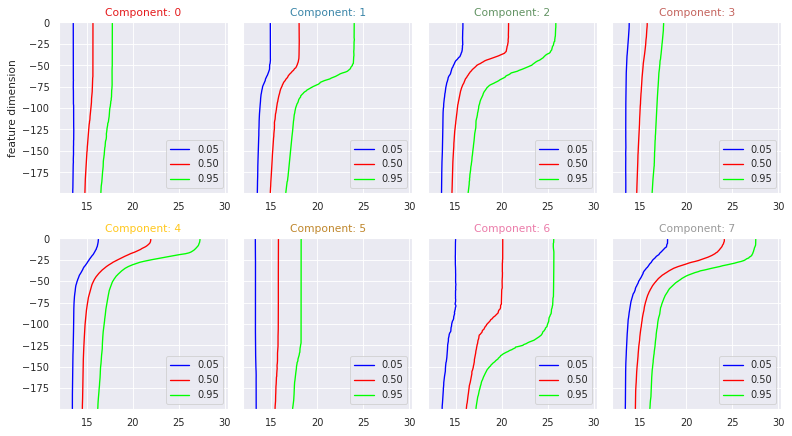

In [16]:
fig, ax = m.plot.quantile(dsi['TEMP_Q'], maxcols=4, figsize=(10, 8), sharey=True)

Geographic distribution of classes

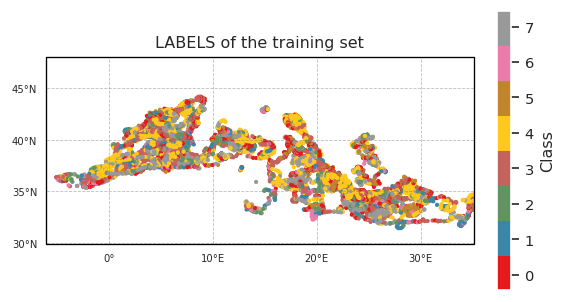

In [17]:
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([-6,35,30,46]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

kmap = m.plot.cmap()
sc = ax.scatter(dsi['LONGITUDE'], dsi['LATITUDE'], s=3, c=dsi['PCM_LABELS'], cmap=kmap, transform=proj, vmin=0, vmax=m.K)
cl = m.plot.colorbar(ax=ax)

gl = m.plot.latlongrid(ax, dx=10)
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.COASTLINE)
#ax.coastlines()
ax.set_title('LABELS of the training set')
plt.show()

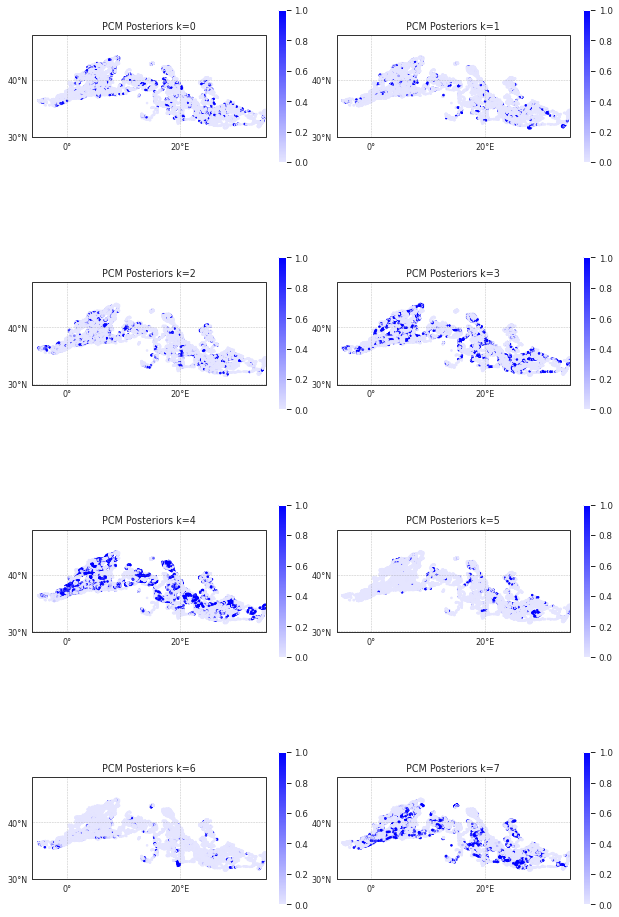

In [18]:
cmap = sns.light_palette("blue", as_cmap=True)
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([-6,35,30,46]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = m.plot.subplots(figsize=(10,22), maxcols=2, subplot_kw=subplot_kw)

for k in m:
    sc = ax[k].scatter(dsi['LONGITUDE'], dsi['LATITUDE'], s=3, c=dsi['PCM_POST'].sel(pcm_class=k),
                       cmap=cmap, transform=proj, vmin=0, vmax=1)
    cl = plt.colorbar(sc, ax=ax[k], fraction=0.03)
    gl = m.plot.latlongrid(ax[k], fontsize=8, dx=20, dy=10)
    #ax[k].add_feature(cfeature.LAND)
    #ax[k].add_feature(cfeature.COASTLINE)
    ax[k].set_title('PCM Posteriors k=%i' % k)